In [4]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Importing Superstore Sample Dataset
DATA =pd.read_csv('SampleSuperstore.csv')
DATA.head()



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
#First 5 sample of dataset
DATA.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
DATA.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
DATA.shape

(9994, 13)

**DATA Cleaning**

In [10]:
DATA = DATA.drop(['Country'], axis =1)

In [11]:
pd.DataFrame(DATA.isnull().sum(),columns=['No. of Null values'])

,No. of Null values
Ship Mode,0
Segment,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0
Quantity,0


In [12]:
DATA.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [13]:
DATA.tail(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [14]:
DATA.duplicated().sum()

17

In [15]:
DATA.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [16]:
DATA['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [17]:
DATA['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [18]:
DATA['City'].nunique()

531

In [19]:
DATA['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [20]:
DATA['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [21]:
DATA=DATA.drop_duplicates(keep='first')

In [22]:
DATA = DATA.sort_values(by='Sales',ascending=False)
DATA

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Same Day,Corporate,Mesquite,Texas,75150,Central,Office Supplies,Binders,0.876,1,0.8,-1.4016
4711,Same Day,Consumer,Philadelphia,Pennsylvania,19120,East,Office Supplies,Binders,0.852,1,0.7,-0.5964
8658,Standard Class,Corporate,Chicago,Illinois,60623,Central,Office Supplies,Binders,0.836,1,0.8,-1.3376
9292,Same Day,Corporate,Waco,Texas,76706,Central,Office Supplies,Binders,0.556,1,0.8,-0.9452


In [23]:
#Importing Libaries
import plotly
import plotly.express as px
import plotly.offline as pyo

In [24]:
#BARCHART
px.bar(DATA,x='Region',y='Sales')

In [25]:
#Z-Score Value
DATA['Z-Score'] = (DATA.Sales-DATA.Sales.mean())/DATA.Sales.std()
DATA

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-Score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.926827
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.688325
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.076861
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.587690
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.465398
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Same Day,Corporate,Mesquite,Texas,75150,Central,Office Supplies,Binders,0.876,1,0.8,-1.4016,-0.367589
4711,Same Day,Consumer,Philadelphia,Pennsylvania,19120,East,Office Supplies,Binders,0.852,1,0.7,-0.5964,-0.367627
8658,Standard Class,Corporate,Chicago,Illinois,60623,Central,Office Supplies,Binders,0.836,1,0.8,-1.3376,-0.367653
9292,Same Day,Corporate,Waco,Texas,76706,Central,Office Supplies,Binders,0.556,1,0.8,-0.9452,-0.368102


In [26]:
DATA.head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-Score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.926827
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.688325
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.076861
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.587690
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.465398


In [27]:
DATA[DATA['Z-Score']>3]
DATA.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-Score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.926827
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.688325
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.076861
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.587690
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.465398
9039,Standard Class,Consumer,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700,15.491838
4098,Standard Class,Consumer,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755,14.781922
4277,Standard Class,Corporate,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818,14.220742
8488,Second Class,Consumer,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840,13.659626
6425,Standard Class,Consumer,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968,13.098520


In [28]:
#Removing Outliers From the Dataset.
DATA_no_outliers = DATA[DATA['Z-Score']<3]

In [29]:
DATA_no_outliers.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-Score
6467,Standard Class,Home Office,Providence,Rhode Island,2908,East,Office Supplies,Storage,2079.400,5,0.0,582.2320,2.964867
949,Standard Class,Home Office,Philadelphia,Pennsylvania,19120,East,Furniture,Tables,2065.320,12,0.4,-619.5960,2.942293
3628,Standard Class,Consumer,Seattle,Washington,98103,West,Office Supplies,Binders,2060.744,7,0.2,643.9825,2.934956
3043,Same Day,Home Office,Long Beach,California,90805,West,Furniture,Chairs,2054.272,8,0.2,256.7840,2.924580
8168,Standard Class,Home Office,Seattle,Washington,98105,West,Furniture,Tables,2036.860,7,0.0,366.6348,2.896664


In [30]:
DATA_no_outliers.shape

(9850, 13)

In [31]:
new_DATA= DATA_no_outliers

In [32]:
#Scatter Plot BEFORE Removing Outliers.
px.scatter(new_DATA,x='Region',y='Sales',size='Sales')

In [33]:
px.scatter_matrix(new_DATA,color='Region',title='Market',dimensions=['Sales', 'Quantity', 'Discount', 'Profit'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



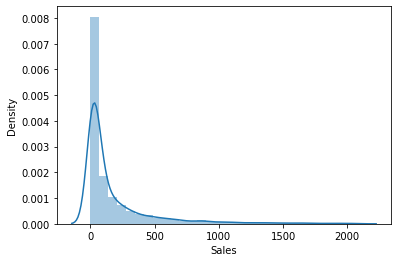

In [34]:
#Distribution Plots
sns.distplot(new_DATA['Sales'],bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



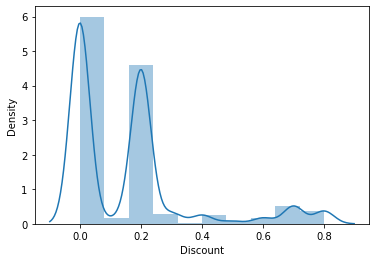

In [35]:
sns.distplot(new_DATA['Discount'],bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



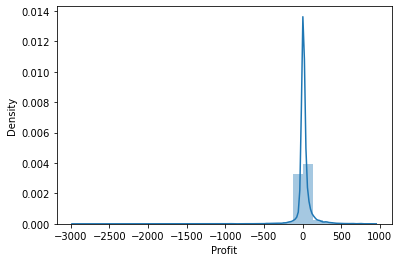

In [36]:
sns.distplot(new_DATA['Profit'],bins=30)

In [37]:
#Normal Distribution Observed in our Data.
new_DATA.corr()

,Postal Code,Sales,Quantity,Discount,Profit,Z-Score
Postal Code,1.000000,-0.003567,0.015628,0.056970,-0.024498,-0.003567
Sales,-0.003567,1.000000,0.255492,-0.042059,0.271649,1.000000
Quantity,0.015628,0.255492,1.000000,0.010968,0.076370,0.255492
Discount,0.056970,-0.042059,0.010968,1.000000,-0.356073,-0.042059
Profit,-0.024498,0.271649,0.076370,-0.356073,1.000000,0.271649
Z-Score,-0.003567,1.000000,0.255492,-0.042059,0.271649,1.000000


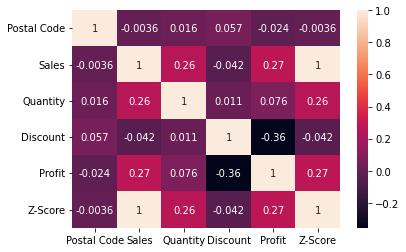

In [38]:
sns.heatmap(new_DATA.corr(),annot=True)

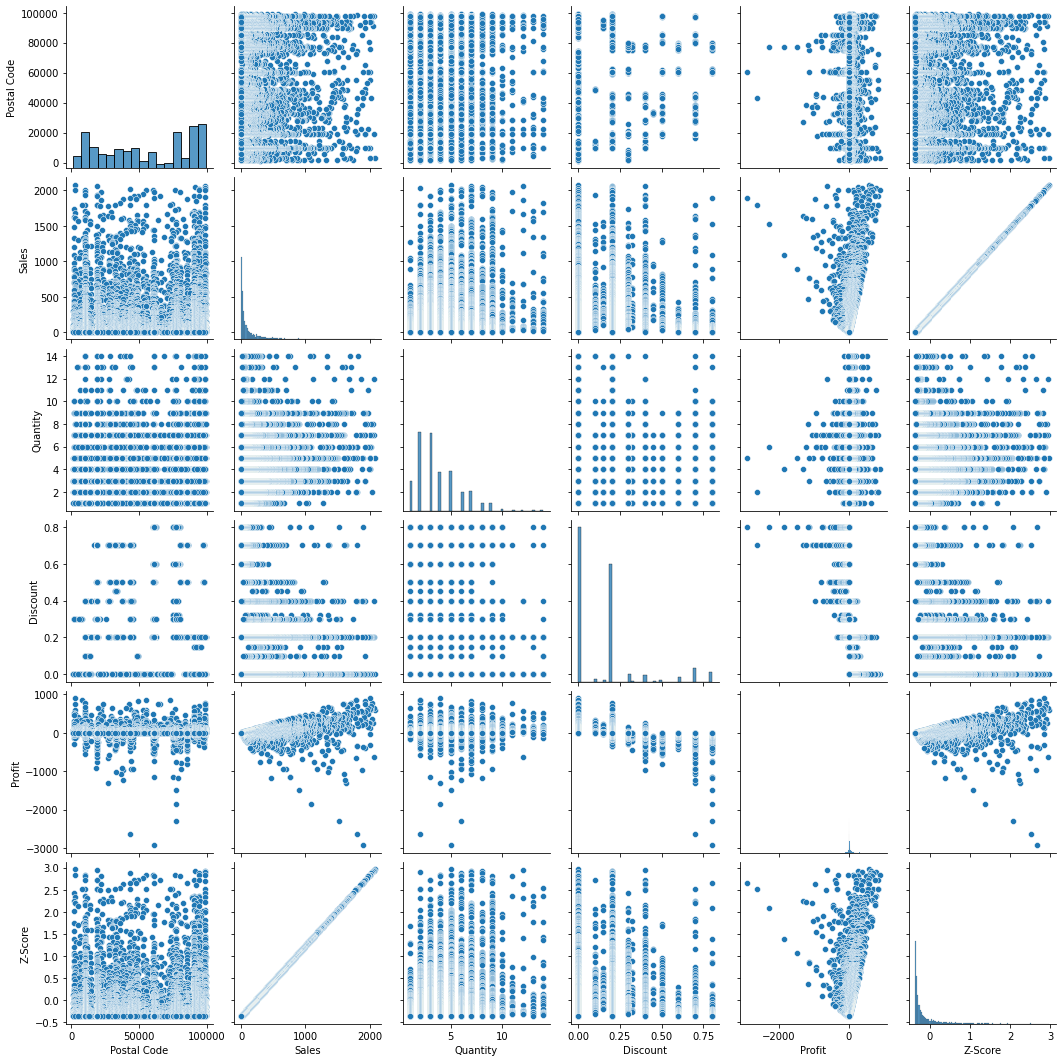

In [39]:
sns.pairplot(new_DATA)

**visualizing the data**

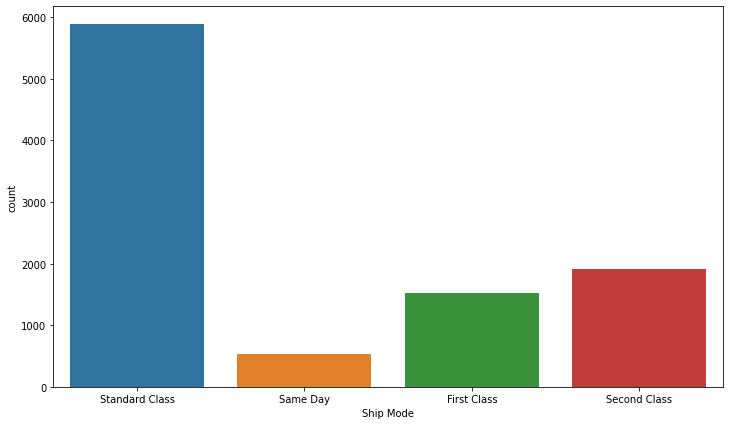

In [40]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_DATA["Ship Mode"])
plt.show()

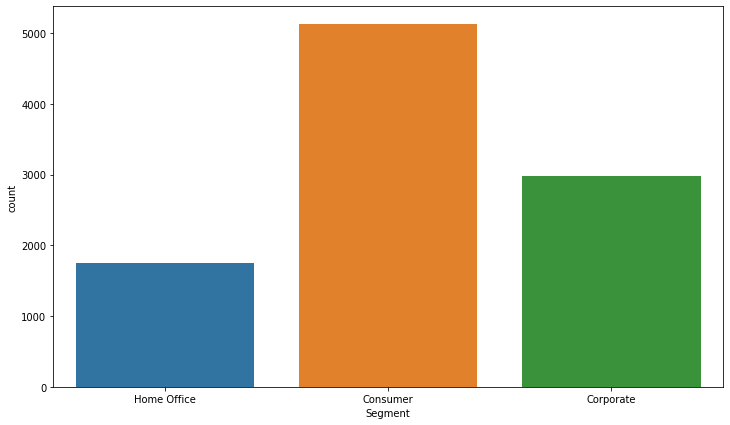

In [41]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_DATA["Segment"])
plt.show()

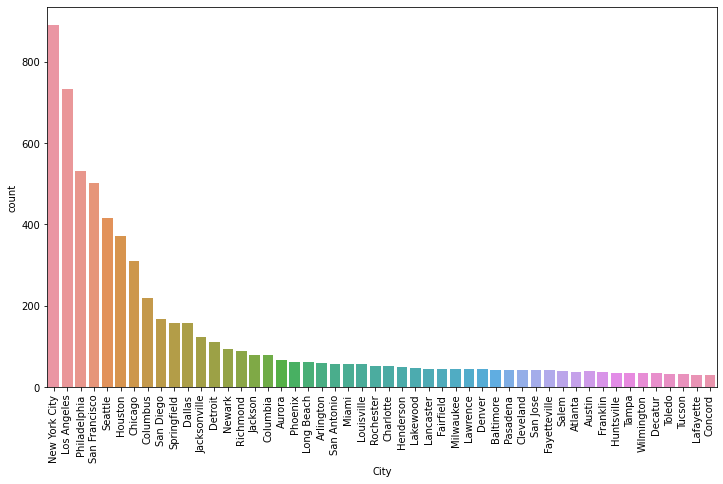

In [42]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_DATA["City"],order=(DATA['City'].value_counts().head(50)).index)
plt.xticks(rotation = 90)
plt.show()

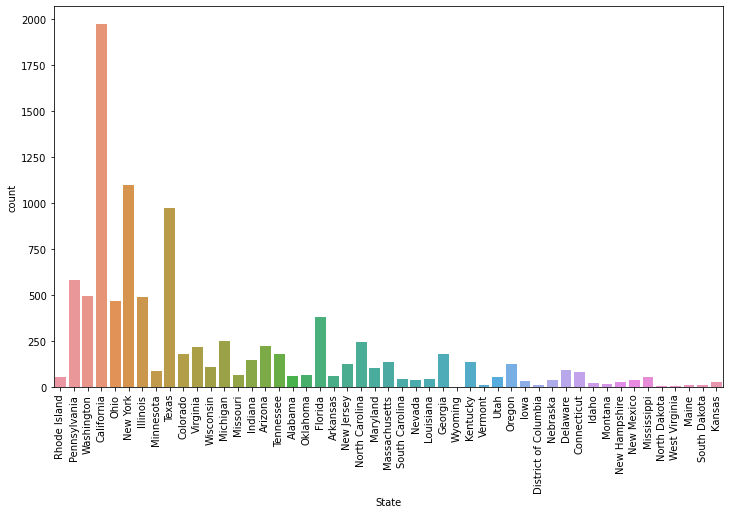

In [43]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_DATA["State"])
plt.xticks(rotation = 90)
plt.show()

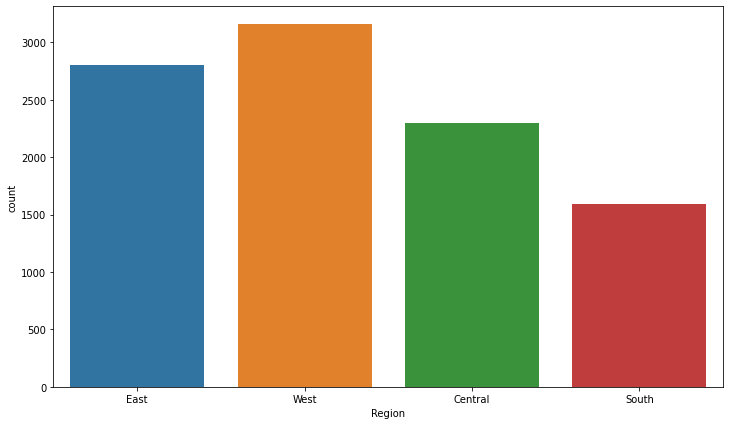

In [44]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_DATA["Region"])
plt.show()

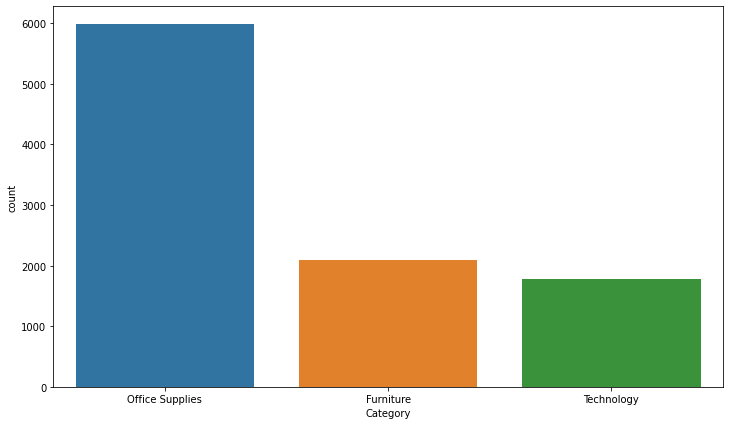

In [45]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_DATA["Category"])
plt.show()

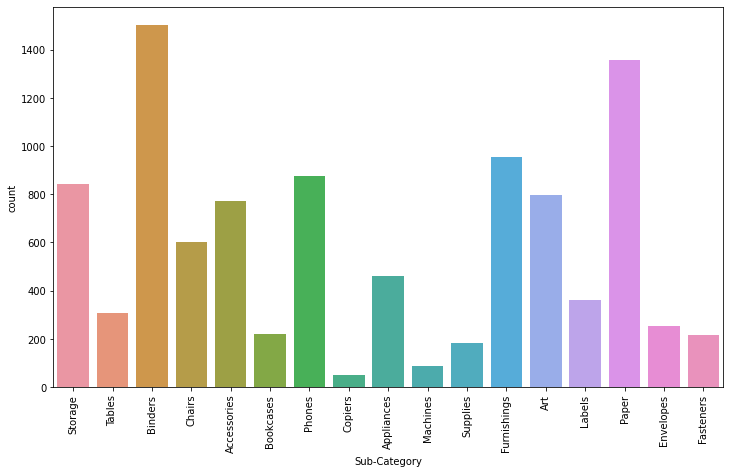

In [46]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_DATA["Sub-Category"])
plt.xticks(rotation = 90)
plt.show()

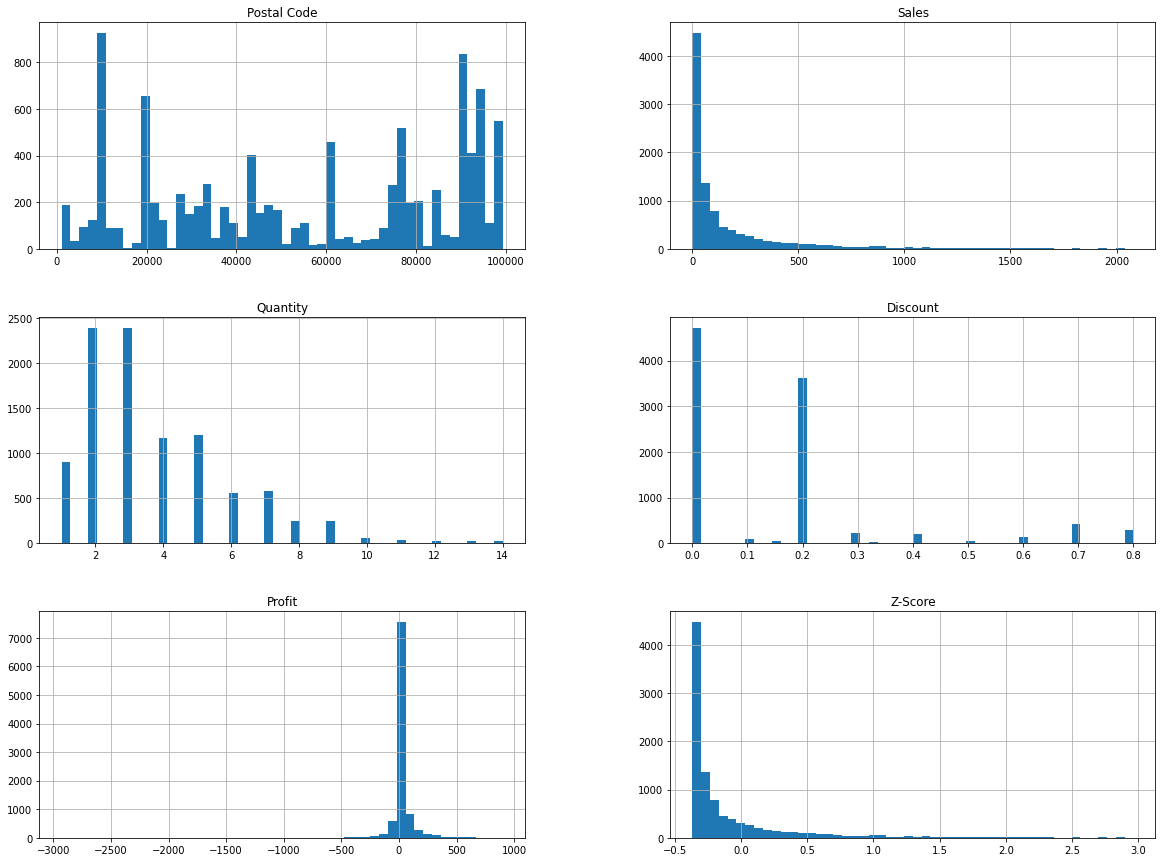

In [47]:
new_DATA.hist(bins=50,figsize=(20,15))
plt.show()

In [48]:
Gp1 = new_DATA.groupby(['Category']).Discount.sum().sort_values(ascending = False).reset_index()
Gp2 =new_DATA.groupby(['Category']).Profit.sum().sort_values(ascending = False).reset_index()
merge1= pd.merge(Gp1, Gp2, how='right',on='Category')
merge1.rename(columns={'Discount':'Overall_Discount','Profit':'Overall_Profit'},inplace = True)
merge1

,Category,Overall_Discount,Overall_Profit
0,Office Supplies,943.20,90137.4134
1,Technology,235.40,86961.0770
2,Furniture,364.12,14180.5464


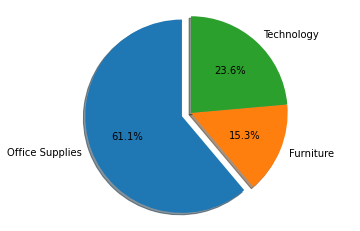

In [49]:
Category = 'Office Supplies','Furniture', 'Technology'
fig1, ax1 = plt.subplots()
explode=(0.1,0,0)#It"explode" the 1st slice
ax1.pie(merge1["Overall_Discount"],explode=explode, labels=Category, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

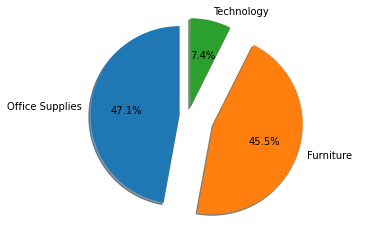

In [50]:
fig1, ax1 = plt.subplots()
explode=(0.1,0.3,0.1)#It"explode" the 1st slice
ax1.pie(merge1["Overall_Profit"],explode=explode, labels=Category, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**=>** From the above two charts we can observed profit percentage and Discount percentage for each category.Here we can visualize that "Office Supplies" has suffered the highest amount of profit and Discount as well but on the other hand "Technology" category has lowest discount among all categories but gaining good amount of profit. we are facing loss in "Furniture" category.

COMPARING DISCOUNT AND PROFIT DIAGRAMS ON THE BASIS OF 'REGION'

In [51]:
Gp3 = new_DATA.groupby(['Region']).Discount.sum().sort_values(ascending = False).reset_index()
Gp4 =new_DATA.groupby(['Region']).Profit.sum().sort_values(ascending = False).reset_index()
merge2= pd.merge(Gp3, Gp4, how='right',on='Region')
merge2.rename(columns={'Discount':'Overall_Discount','Profit':'Overall_Profit'},inplace = True)
merge2

,Region,Overall_Discount,Overall_Profit
0,West,344.15,83863.0740
1,East,409.30,53808.4599
2,South,235.65,37838.8593
3,Central,553.62,15768.6436


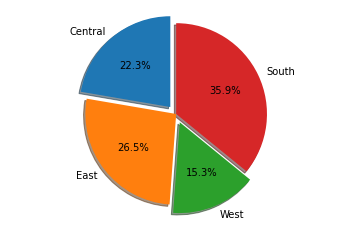

In [52]:
Region =  'Central', 'East','West','South'
fig1, ax1 = plt.subplots()
explode=(0.1,0,0.1,0)#It"explode" the 1st slice
ax1.pie(merge2["Overall_Discount"],explode=explode, labels=Region, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

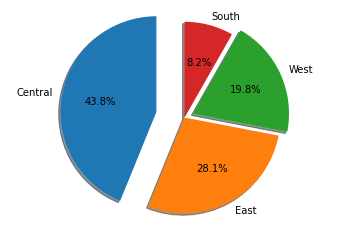

In [53]:
Region =  'Central', 'East','West','South'
fig1, ax1 = plt.subplots()
explode=(0.3,0,0.1,0)#It"explode" the 1st slice
ax1.pie(merge2["Overall_Profit"],explode=explode, labels=Region, autopct='%1.1f%%',shadow=True,startangle=90)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**=>**From the above two charts we can obseved a huge amount of loss in "central" Region beacause Company(store) is offering high Discount on Products in the Central Region but Outcome is very less.Now take a look at the percentage of "West" Region og Discount & Profit almost here Profit is double the Discount

COMPARING QUANTITY AND SALES DIAGRAMS ON THE BASIS OF 'CATEGORY'

In [54]:
Gp5 = new_DATA.groupby(['Category']).Quantity.sum().sort_values(ascending = False).reset_index()
Gp6 =new_DATA.groupby(['Category']).Sales.sum().sort_values(ascending = False).reset_index()
merge3= pd.merge(Gp5, Gp6, how='right',on='Category')
merge3.rename(columns={'Quantity':'Total_Quantity','Sales':'Total_Sales'},inplace = True)
merge3

,Category,Total_Quantity,Total_Sales
0,Furniture,7767,643351.3987
1,Office Supplies,22690,594047.0720
2,Technology,6571,543164.3200


In [55]:
new_DATA['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

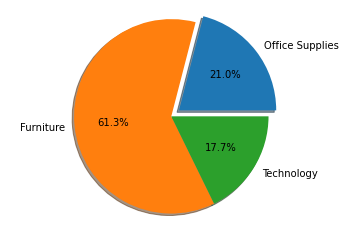

In [56]:
Category = 'Office Supplies', 'Furniture', 'Technology'
fig1, ax1 = plt.subplots()
explode=(0.1,0,0)#It"explode" the 1st slice
ax1.pie(merge3["Total_Quantity"],explode=explode, labels=Category, autopct='%1.1f%%',shadow=True)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

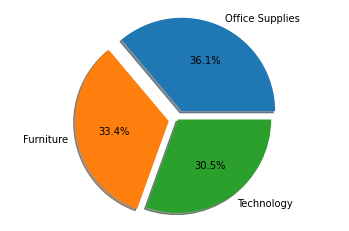

In [57]:
fig1, ax1 = plt.subplots()
explode=(0.1,0.1,0)#It"explode" the 1st slice
ax1.pie(merge3["Total_Sales"],explode=explode, labels=Category, autopct='%1.1f%%',shadow=True)##explode must be a length of X
ax1.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Above Charts representing "Office Supplies" has the highest amount of quantity and Sales also but on the other hand "Technology" category & "Furniture" category consist of lesser amount of total quantity but Total Sales Percentage are good enough.

Top 10 Profitable Cities.x

In [58]:
dt_top_10_cities = new_DATA.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
dt_top_10_cities.head(10)

,City,Profit
329,New York City,34874.4919
266,Los Angeles,24583.2187
452,Seattle,17546.8109
438,San Francisco,15637.1237
123,Detroit,6819.3475
94,Columbus,5144.7783
437,San Diego,4969.8885
407,Richmond,4872.7471
215,Jackson,4688.6484
93,Columbia,4335.1267


In [59]:
dt_top_10_cities = new_DATA.groupby("City")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
dt_top_10_cities.head(10)

,City,Discount
374,Philadelphia,173.90
207,Houston,141.42
80,Chicago,119.30
109,Dallas,56.30
266,Los Angeles,53.15
329,New York City,49.70
94,Columbus,38.20
216,Jacksonville,35.15
438,San Francisco,33.60
452,Seattle,27.00


In [60]:
#Top 10 Profitable Sub-Categories.
dt_top_10_sub_categories = new_DATA.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
dt_top_10_sub_categories.head(10)

,Sub-Category,Profit
0,Accessories,39503.4923
13,Phones,37886.6451
12,Paper,33944.2395
5,Chairs,21966.2259
14,Storage,19864.5829
1,Appliances,14633.8139
6,Copiers,13974.6680
9,Furnishings,13052.7230
7,Envelopes,6964.1767
2,Art,6524.6118


In [61]:
dt_top_10_sub_categories = new_DATA.groupby("Sub-Category")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
dt_top_10_sub_categories.head(10)

,Sub-Category,Discount
3,Binders,563.60
13,Phones,136.20
9,Furnishings,132.40
5,Chairs,102.80
12,Paper,101.80
16,Tables,82.15
1,Appliances,77.60
14,Storage,63.20
0,Accessories,60.80
2,Art,59.60


In [62]:
#Top 2 sales Region
dt_top_10_region = new_DATA.groupby("Region")["Sales"].sum().reset_index().sort_values(by="Sales",ascending=False)
dt_top_10_region.head(2)

,Region,Sales
3,West,592408.1675
1,East,506352.1500


**-> Profit & Sales Correlation Matrix showing a positive relationship.
The company offers more discounts on furniture and office supplies. Company (Store) in Central Region is giving lots of discounts, but the output is very low.
Company provides highest quantity to Office Suppliers, but sales are not good enough, so quantity should be minimized and provided instead to Furniture Suppliers.** 